# Customer churn prediction 
Dataset: 
https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset/download?datasetVersionNumber=1 

Objective: Build a binary classifier that predicts if a bank’s customer is going to churn or not. 

Your solution should address at least the following steps:

* Read the dataset and display columns. 
* Analyze the data and state your observations. 
* Select columns that are probably important to predict if a customer is going to churn (i.e., if a customer is stopping doing business with a company). You can also remove columns or create new ones, motivating your choices.
* Create training and test sets. 
* Train a Machine Learning model to predict if a customer is going to churn.
* Evaluate your model on the test set, describing the metrics you are using and why you are using them. Comment on the results. 


## Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE

## Dataset
The task of ***Customer Churn Prediction*** aims to understand whether customers are likely to leave or unsubscribe from your service. 


This dataset contains *customer_id, credit_score, country, 
gender,
age, 
tenure, 
balance, 
products_number, 
credit_card, 
active_member, and
estimated_salary* as features and churn is labelled as 1 if the client has left the bank during some period or as 0 if he/she has not.


### 1. Read the dataset and check the first rows


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/Bank Customer Churn Prediction.csv')

In [ ]:
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


### 2. Check whether there are null values or duplicated rows.

In [ ]:
df.isnull().sum() #checking the null values

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


In [ ]:
df.duplicated().sum()

0

There are no null values or duplicated rows.

### 3. Plotting correlation

<Axes: >

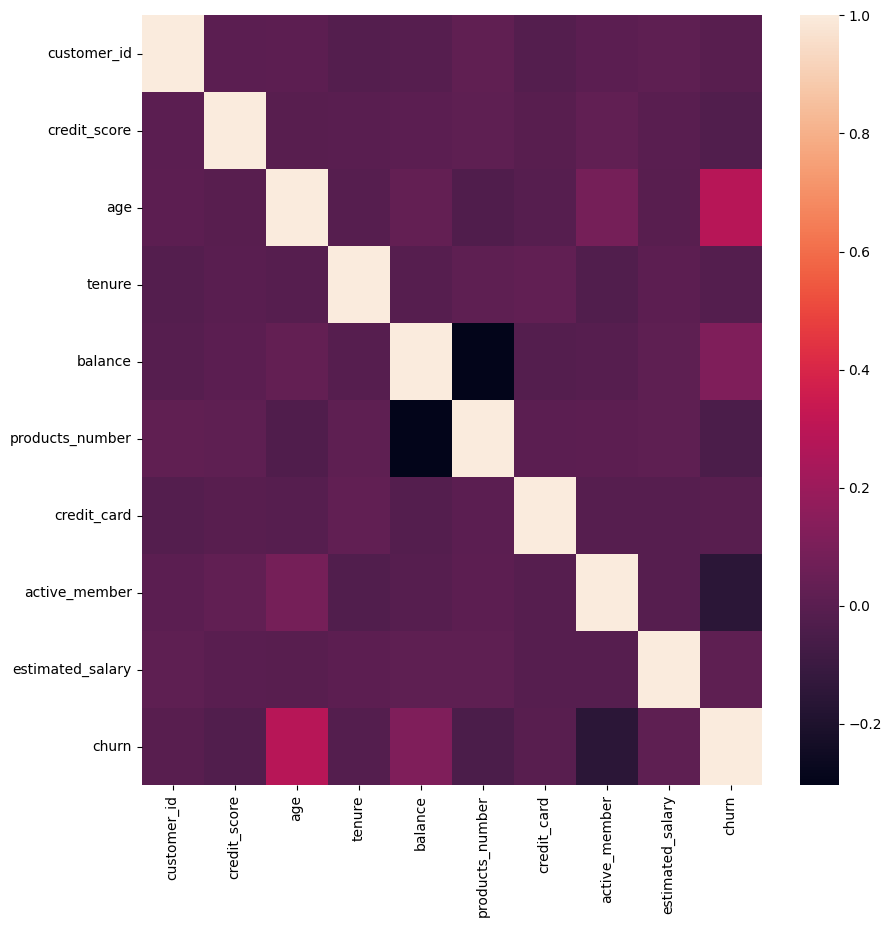

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr())

### 4. Remove customer_id from df

Customer_id won't be used as feature as it is not relevant for the task of interest.

In [ ]:
df.drop('customer_id', 1, inplace=True) 

### 5. Encode categorical features

Following analysis is to reveal whether 'country' and 'gender' are relevant for predicting churn status.

In order to uncover the relationship/association  between these categorical variables and response (churn or not churn), chi square test will be used.

In [ ]:
#Creating contingency table for country and churn
cont_table = pd.crosstab(df["country"], df["churn"])
cont_table

churn,0,1
country,,
France,4204,810
Germany,1695,814
Spain,2064,413


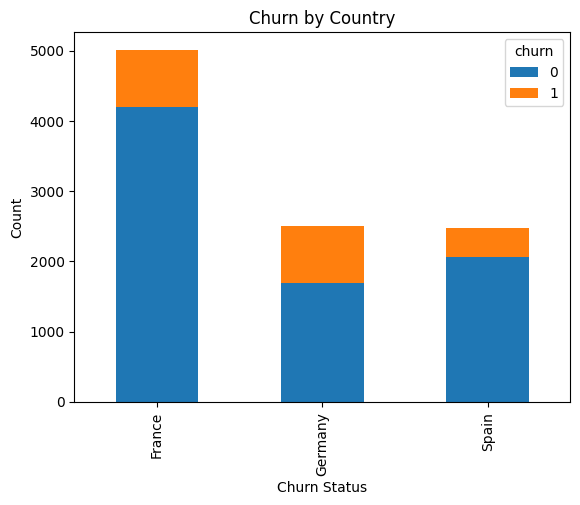

In [ ]:
cont_table.plot(kind='bar', stacked=True)
plt.title('Churn by Country')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.show()

In [ ]:
chi2, p, dof, expected = chi2_contingency(cont_table)
print("Chi-squared test statistic:", chi2)
print("P-value:", p) 

Chi-squared test statistic: 301.25533682434536
P-value: 3.8303176053541544e-66


Chi-square statistic is large and the p-value is small; there is a significant association between country and churn status.

In [ ]:
#Creating contingency table for gender of the customer and churn
cont_table = pd.crosstab(df["gender"], df["churn"])
cont_table

churn,0,1
gender,,
Female,3404,1139
Male,4559,898


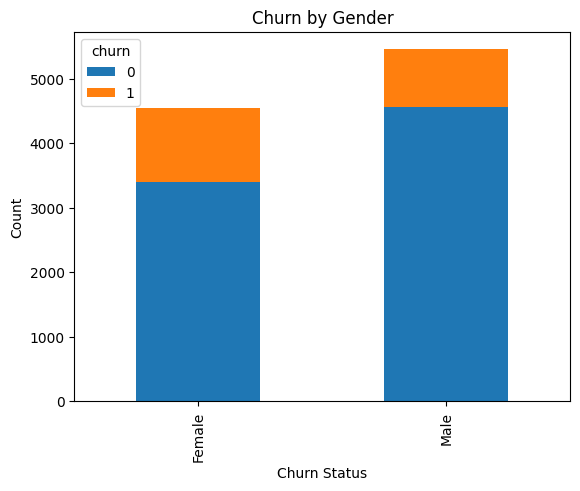

In [ ]:
cont_table.plot(kind='bar', stacked=True)
plt.title('Churn by Gender')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.show()

In [ ]:
chi2, p, dof, expected = chi2_contingency(cont_table)
print("Chi-squared test statistic for churn and gender :", chi2)
print("P-value:", p) 

Chi-squared test statistic for churn and gender : 112.91857062096116
P-value: 2.2482100097131755e-26


Chi-square statistic is large and the p-value is small; there is a significant association between gender and churn status.

In [ ]:
df = pd.get_dummies(df) #one-hot encoding country and gender as they are statistically significant
df.head(10)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0,0,1


### 6. Check class imbalance in the dataset

In [ ]:
#checking the ratio of the classes
df['churn'].value_counts(normalize=True) #mildly imbalanced

0   0.80
1   0.20
Name: churn, dtype: float64

<Axes: >

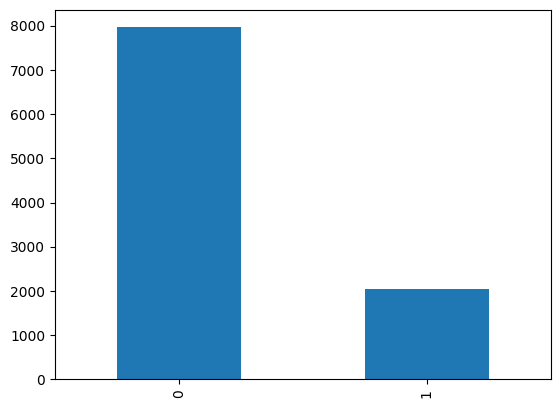

In [ ]:
df['churn'].value_counts().plot.bar()

###  7. Oversampling the minority class

To balance the dataset Syntetic Minority Over-Sampling Technique (SMOTE) will be used.     

The SMOTE algorithm can be described as follows:
* Take difference between a sample and its nearest neighbour
* Multiply the difference by a random number between 0 and 1
* Add this difference to the sample to generate a new synthetic example in feature space
* Continue on with next nearest neighbour up to user-defined number


In [ ]:
smote = SMOTE(random_state=42)

X = df.drop('churn', axis=1)
y = df['churn']

X_res, y_res = smote.fit_resample(X, y) #oversampling with SMOTE as dataset is imbalanced

### 8. Splitting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

### 9. Standardize the data

In [ ]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

## Model

### 1. Using LazyClassifier to compare multiple models.

lazypredict is a convenient wrapper library, that enables us to quickly fit all the models to our dataset and compare their performance. This way, we can see what works well "out of the box”. 

In [ ]:
#model - comparing the performance of classifiers
model = LazyClassifier(verbose = 0, classifiers='all')
listofmodels, churnpredictions= model.fit(X_train_scaled, X_test_scaled, y_train, y_test)

100%|██████████| 29/29 [00:40<00:00,  1.38s/it]


In [ ]:
print(listofmodels)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.90               0.90     0.90      0.90   
RandomForestClassifier             0.90               0.90     0.90      0.90   
LGBMClassifier                     0.89               0.89     0.89      0.89   
XGBClassifier                      0.89               0.89     0.89      0.89   
BaggingClassifier                  0.89               0.89     0.89      0.89   
SVC                                0.89               0.89     0.89      0.89   
AdaBoostClassifier                 0.87               0.87     0.87      0.87   
LabelSpreading                     0.86               0.86     0.86      0.86   
LabelPropagation                   0.86               0.86     0.86      0.86   
NuSVC                              0.86               0.86     0.86      0.86   
KNeighborsClassifier        

In [ ]:
listofmodels.sort_values('Accuracy', inplace = True, ascending = False)
graph = px.line(listofmodels, y =['Accuracy'], markers = True)
graph.update_xaxes(title = 'Model')
graph.update_yaxes(title = 'Accuracy of Model')
graph.update_layout(title = 'Accuracy of Models', showlegend = True)
graph

### 2. Optimizing the best classifier 

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1633
           1       0.91      0.88      0.89      1553

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



In [ ]:
rf.get_params()  #getting the default parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Grid Search for RF hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
  }

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.8927001569858712


Optimized parameters:
1. n_estimators: number of trees in the forest
2. max_features: maximum number of features to try in individual tree; **sqrt** will take the square root of the total number of features in each run.
3. max_depth: max depth of the tree.
4. min_samples_split: The minimum amount of samples an internal node must hold in order to split into further nodes.
5. min_samples_leaf:The minimum amount of samples that a node must hold after getting split.
6. bootstrap: Whether bootstrap samples are used when building trees.


## Evaluation

### 1. Training the model with best parameters obtained through gridsearch.

In [ ]:
rf = RandomForestClassifier(bootstrap=False, max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=300)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=False, max_features='log2', n_estimators=300)

### 2. Evaluating the model using the following metrics:
* Accuracy: True Positive + True Negative / Total Predictions
As the dataset is balanced, accuracy is a reliable metric to evaluate how accurate the model is.

* Precision: True Positive / True Postive + False Positive
To provide insights regarding how precise is the model when predicting a certain class.

* Recall: True Positive / True Positive + False Negative
To see how good the model is in terms of correctly classifying points that belong to a certain class.

* F1: Metric that combines the recall and precision scores of the model.



In [ ]:
y_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1633
           1       0.90      0.89      0.90      1553

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



The results of the model trained with optimum parameters does not show a difference with the model trained with default parameters. This shows that the algorithm is overall well-suited for the task of interest and the dataset.